In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cantera as ct
from streams import streams

## Streams

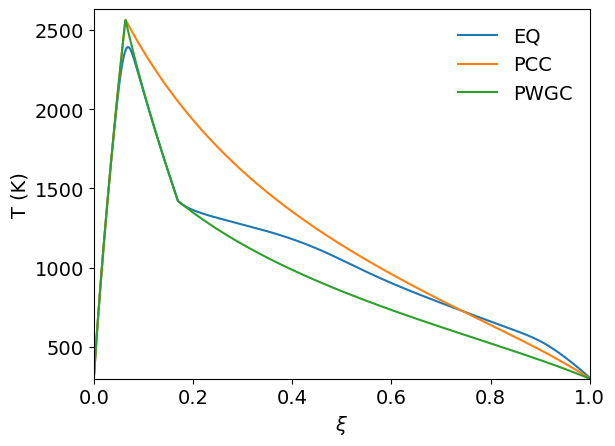

In [3]:
gas = ct.Solution("gri30.yaml")

strm = streams("O2:1, N2:3.76", "C2H4:1", 300, 300, 101325, "gri30.yaml")

nξ = 1000
ξ = np.linspace(0,1,nξ)

Tad_eq  = np.zeros(nξ)
Tad_pcc = np.zeros(nξ)
Tad_wgs = np.zeros(nξ)

for i in range(nξ):
    Tad_eq[i]  = strm.get_Tad_for_EQ(ξ[i])
    Tad_pcc[i] = strm.get_Tad_for_pCC(ξ[i])
    Tad_wgs[i] = strm.get_Tad_for_pWGS(ξ[i])
    
#-----------------------

plt.rc('font', size=14)
plt.plot(ξ, Tad_eq)
plt.plot(ξ, Tad_pcc)
plt.plot(ξ, Tad_wgs)
plt.legend(['EQ', 'PCC', 'PWGC'], frameon=False)
plt.xlabel(r'$\xi$')
plt.ylabel('T (K)')
plt.xlim([0,1])
plt.ylim([300,np.max(Tad_eq)*1.1]);


## Cantera

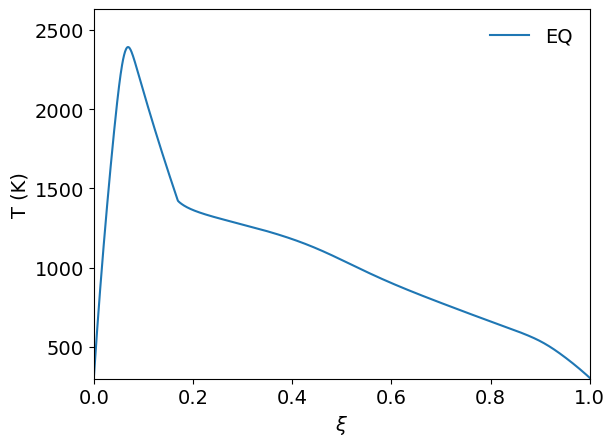

In [5]:

gas = ct.Solution("gri30.yaml")

gas.TPX = 300, 101325, "O2:1, N2:3.76"
h0 = gas.h
y0 = gas.Y

gas.TPX = 300, 101325, "C2H4:1"
h1 = gas.h
y1 = gas.Y

nξ = 1000
ξ = np.linspace(0,1,nξ)

Tad_eq  = np.zeros(nξ)

for i in range(nξ):
    y = y0*(1-ξ[i]) + y1*(ξ[i])
    h = h0*(1-ξ[i]) + h1*(ξ[i])
    gas.HPY = h, 101325, y
    gas.equilibrate("HP")
    Tad_eq[i] = gas.T
    
#-----------------------

plt.rc('font', size=14)
plt.plot(ξ, Tad_eq)
plt.legend(['EQ'], frameon=False)
plt.xlabel(r'$\xi$')
plt.ylabel('T (K)')
plt.xlim([0,1])
plt.ylim([300,np.max(Tad_eq)*1.1]);